In [2]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from collections import Counter
import os
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
from keras.models import Sequential
from keras.layers import Embedding
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
from collections import Counter
import numpy as np
from tensorflow.keras.preprocessing import sequence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import scikitplot as skplt


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.metrics.plot_confusion_matrix(yte, ypred)
    plt.show()
    
xtr = np.load('./x_train.npy', allow_pickle=True)
xte = np.load('./x_test.npy', allow_pickle=True)
y_train = np.load('./y_train.npy', allow_pickle=True)
y_test = np.load('./y_test.npy', allow_pickle=True)

In [24]:
unique_labels = np.unique(y_train)
unique_labels

array(['Center', 'Lean Left', 'Lean Right', 'Left', 'Right'], dtype='<U10')

In [8]:
# Define a mapping from labels to integers
label_mapping = {'Left': 0, 'Lean Left': 1, 'Center': 2, 'Lean Right': 3, 'Right': 4}

# Apply the mapping to your labels
y_train_encoded = np.array([label_mapping[label] for label in y_train])
y_test_encoded = np.array([label_mapping[label] for label in y_test])

# Check the transformed data
print("Encoded y_train: ", y_train_encoded[:5])
print("Encoded y_test: ", y_test_encoded[:5])

Encoded y_train:  [2 4 3 0 2]
Encoded y_test:  [4 4 3 4 4]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam


# Model definition
model = Sequential()
model.add(Embedding(input_dim=top_words + 1, output_dim=embedding_vector_length))
model.add(LSTM(units=100, input_shape=(max_review_length, embedding_vector_length)))  # Set input shape here if needed
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtr, y_train_encoded, epochs=epoch_num, batch_size=batch_size, validation_data=(xte, y_test_encoded))


AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [28]:
# Display the model summary
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (64, 300, 32)               │         160,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (64, 100)                   │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (64, 1)                     │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 640,001 (2.44 MB)

 Trainable params: 213,333 (833.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 426,668 (1.63 MB)

None


In [38]:
# Now, try evaluating the model again
scores = model.evaluate(xte, y_test_encoded, verbose=0)
print("Accuracy: {:.2f}%".format(scores[1]*100))

Accuracy: 20.02%


5548/5548 ━━━━━━━━━━━━━━━━━━━━ 808s 146ms/step


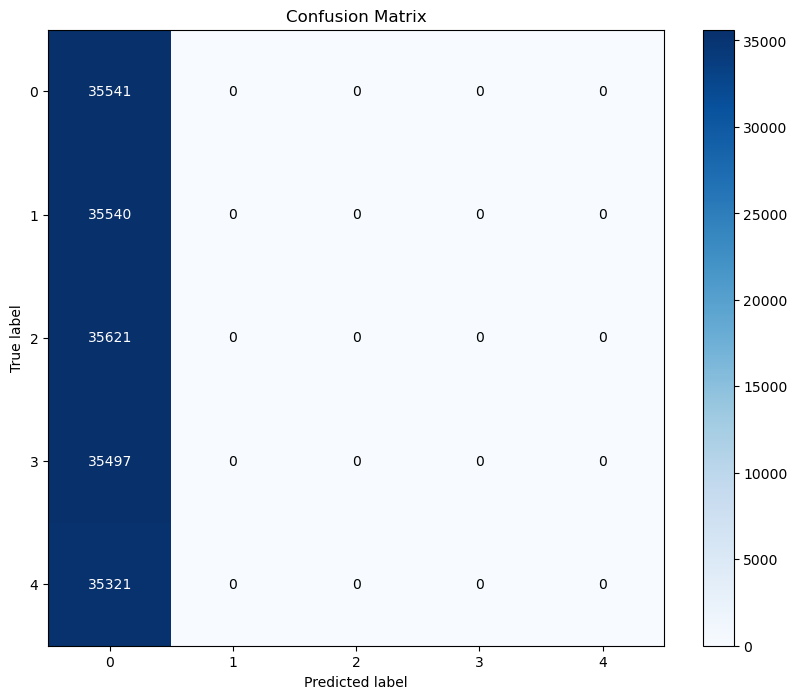

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

# Define the plot_cmat function using scikitplot
def plot_cmat(y_true, y_pred):
    skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(10,8))
    plt.show()

# Assuming 'model.predict' gives you a matrix of class probabilities
y_pred_proba = model.predict(xte)

# Convert predicted probabilities to class labels using argmax
y_pred = np.argmax(y_pred_proba, axis=1)

# Draw the confusion matrix
plot_cmat(y_test_encoded, y_pred)

In [40]:
# Assuming top_words is the size of your vocabulary, and y_train_encoded and y_test_encoded are one-hot encoded
top_words = len(vocabulary)
embedding_vector_length = 32  # This is arbitrary, set based on your dataset
max_review_length = 500  # This needs to be set based on the length of your input sequences

# One-hot encode labels
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

NameError: name 'vocabulary' is not defined

In [ ]:
# Model definition
model = Sequential()
model.add(Embedding(input_dim=top_words + 1, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(LSTM(units=100))
model.add(Dense(units=5, activation='softmax'))  # Adjust number of units to match the number of classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_encoded, epochs=epoch_num, batch_size=batch_size, validation_data=(x_test, y_test_encoded))

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.test.is_gpu_available())
print("Is built with CUDA:", tf.test.is_built_with_cuda())
print("GPU device list:", tf.config.list_physical_devices('GPU'))